CE080_Vedant_Parikh

Machine Learning

Lab : 07

### Perform logistic regression , create hypothesis and loss function 

In [ ]:
import numpy as np
import pandas as pd
import io
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from copy import deepcopy
import tensorflow as tf
from math import exp
data = pd.read_csv('/content/drive/MyDrive/BuyComputer.csv')
data.drop(columns = ['User ID',], axis = 1, inplace = True)
x = data[data.columns[:-1]]
y = data[data.columns[-1]]
sc=StandardScaler()
x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.90, random_state = 137)
total_features = len(x_train[0])
entries=x_train[:,0]
x_train = np.array(x_train)
y_train = np.array(y_train)
weights=np.array([[2.] for _ in range(total_features)])
bias=np.array([[0.2] for _ in range(len(x_train))])
x_train=torch.tensor(x_train,requires_grad=False)
y_train=torch.tensor(y_train,requires_grad=False)
iterations=1
for _ in range(iterations):
  weights=torch.tensor(weights,requires_grad=True)
  bias=torch.tensor(bias,requires_grad=True)
  z=torch.matmul(x_train,weights)+bias
  z1=torch.exp(-z)
  denom=torch.add(z1,1)
  y_pred=denom.clone()
  y_pred.pow_(-1)
  y_pred=y_pred.round()
  print(torch.log(y_pred))
  first=torch.mul(y_train,torch.log(y_pred))
  second=torch.mul(torch.sub(1.,y_train),torch.log(torch.sub(1.,torch.log(y_pred))))
  loss=torch.add(first,second)
  print(loss)


tensor([[0.],
        [0.],
        [0.],
        [-inf],
        [-inf],
        [0.],
        [-inf],
        [-inf],
        [-inf],
        [0.],
        [0.],
        [-inf],
        [-inf],
        [0.],
        [0.],
        [-inf],
        [0.],
        [0.],
        [0.],
        [-inf],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-inf],
        [0.],
        [0.],
        [0.],
        [0.],
        [-inf],
        [0.],
        [0.],
        [0.],
        [-inf],
        [-inf],
        [-inf],
        [0.]], dtype=torch.float64, grad_fn=<LogBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64,
       grad_fn=<AddBackward0>)


In [ ]:
from tensorflow.python.ops.array_ops import zeros_like_v2
import numpy as np
import pandas as pd
import io
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import tensorflow as tf

from math import exp

learning_rate=0.001

def convert(arr):
  return [[elem] for elem in arr]

def deconvert(arr):
  return [elem[0] for elem in arr]

def sigmoid(z):
  denom=1+np.exp(-z)
  value=1/denom
  return value
  pass

def predict(input,weights,bias):
  z=np.dot(input,weights)
  z+=bias
  pred=sigmoid(z)
  return pred

def predict_bulk(input,weights,bias):
  pred=[]
  for sample in input:
    pred_i=predict(sample,weights,bias)
    pred.append(pred_i)
  pred=np.array(pred)
  pred=np.round(pred)

  return pred
  pass

def partial_derivate(pred,output,x):
  first=(pred-output)
  x=convert(x)
  der_all=first*x
  
  der_all=deconvert(der_all)
  der_value=sum(der_all)/len(der_all)
  return der_value
  pass
def param_update(features,pred,output,params):
  updated_params=[]
  for i in range(len(params)):
    x_i=np.array(features[:,i])
    d_i=partial_derivate(pred,output,x_i)
    deduct=learning_rate*d_i
    curr_param=params[i]
    curr_param=curr_param-deduct
    updated_params.append(curr_param)
  return updated_params
  pass


def calculate_loss(pred,output):
  pass

def calculate_accuracy(y_pred,y_act):
  cmat=confusion_matrix(y_pred,y_act)
  truth=sum(cmat[i][i] for i in range(len(cmat)))
  total=0
  for row in cmat:
    for elem in row:
      total+=elem
  return truth/total

location="/content/drive/MyDrive/BuyComputer.csv"
data = pd.read_csv(location, encoding="latin")
data.drop(columns=['User ID',],axis=1,inplace=True)

x=data[data.columns[:-1]]
y=data[data.columns[-1]]

sc=StandardScaler()
x=sc.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.90, random_state =137)

total_features=len(x_train[0])

entries=x_train[:,0]

x_train=np.array(x_train)
y_train=convert(y_train)
y_train=np.array(y_train)

y_test=np.array(convert(y_test))

weights=np.array([[2.] for _ in range(total_features)])
bias=np.array([0.10])

iterations=10000
accuracy=0
for _ in range(iterations):
  pred=predict_bulk(x_train,weights,bias)
  weights,bias=param_update(x_train,pred,y_train,[weights,bias])
  c_accuracy=calculate_accuracy(pred,y_train)
  accuracy=max(accuracy,c_accuracy)

print(weights,bias)
print(accuracy)


# testing model
y_pred=predict_bulk(x_test,weights,bias)
test_accuracy=calculate_accuracy(y_pred,y_test)
print(test_accuracy)

[[1.76753452]
 [1.76753452]] [-1.23068]
0.9
0.8277777777777777


0.85
0.8111111111111111


<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, **kwargs)>

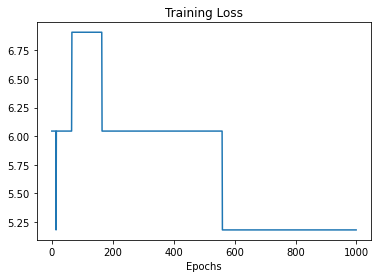

In [ ]:
from tensorflow.python.ops.array_ops import zeros_like_v2
import numpy as np
import pandas as pd
import io
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import tensorflow as tf

from math import exp

learning_rate=0.005

def convert(arr):
  return [[elem] for elem in arr]

def deconvert(arr):
  return [elem[0] for elem in arr]

def sigmoid(z):
  denom=1+np.exp(-z)
  value=1/denom
  return value
  pass

def predict(input,weights,bias):
  z=np.dot(input,weights)
  z+=bias
  pred=sigmoid(z)
  return pred

def predict_bulk(input,weights,bias):
  pred=[]
  for sample in input:
    pred_i=predict(sample,weights,bias)
    pred.append(pred_i)
  pred=np.array(pred)
  pred=np.round(pred)

  return pred
  pass

def partial_derivate(pred,output,x):
  first=(pred-output)
  x=convert(x)
  der_all=first*x
  
  der_all=deconvert(der_all)
  der_value=sum(der_all)/len(der_all)
  return der_value
  pass

def param_update(features,pred,output,params):
  updated_params=[]
  for i in range(len(params)):
    x_i=np.array(features[:,i])
    d_i=partial_derivate(pred,output,x_i)
    deduct=learning_rate*d_i
    curr_param=params[i]
    curr_param=curr_param-deduct
    updated_params.append(curr_param)
  return updated_params
  pass


def calculate_loss(pred,output):
  # remaining to calculate
  pass

def calculate_accuracy(y_pred,y_act):
  cmat=confusion_matrix(y_pred,y_act)
  # print(cmat)
  truth=sum(cmat[i][i] for i in range(len(cmat)))
  total=0
  for row in cmat:
    for elem in row:
      total+=elem
  return truth/total

location="/content/drive/MyDrive/BuyComputer.csv"
data = pd.read_csv(location, encoding="latin")
data.drop(columns=['User ID',],axis=1,inplace=True)

x=data[data.columns[:-1]]
y=data[data.columns[-1]]

sc=StandardScaler()
x=sc.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.90, random_state =137)

total_features=len(x_train[0])

entries=x_train[:,0]

x_train=np.array(x_train)


y_train=convert(y_train)
y_train=np.array(y_train)

y_test=np.array(convert(y_test))


weights=np.array([[2.] for _ in range(total_features)])
bias=np.array([0.10])

iterations=1000
accuracy=0
loss_list = []
for _ in range(iterations):
  pred=predict_bulk(x_train,weights,bias)
  weights,bias=param_update(x_train,pred,y_train,[weights,bias])
  c_accuracy=calculate_accuracy(pred,y_train)
  accuracy=max(accuracy,c_accuracy)
  loss = log_loss(y_train,pred)
  loss_list.append(loss)

print(accuracy)

# testing model
y_pred=predict_bulk(x_test,weights,bias)
test_accuracy=calculate_accuracy(y_pred,y_test)
print(test_accuracy)

# Plot training loss
plt.plot(loss_list)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
# Generate random data
# X, y = make_classification(n_samples=100, n_features=10, n_classes=2, random_state=42)
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.90, random_state =137)

location="/content/drive/MyDrive/BuyComputer.csv"
data = pd.read_csv(location, encoding="latin")
data.drop(columns=['User ID',],axis=1,inplace=True)

x=data[data.columns[:-1]]
y=data[data.columns[-1]]

sc=StandardScaler()
x=sc.fit_transform(x)

X=x
# Create model and set hyperparameters
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Train the model and get the loss over epochs
train_losses = []
for epoch in range(1, 1001):
    model.fit(x_train, y_train)
    train_loss = log_loss(y,model.predict(x_test))
    train_losses.append(train_loss)

# Plot the loss over epochs
plt.plot(range(1, 1001), train_losses)
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
